<h2 align="center">EE1103 Numerical Methods</h2> 
<h3 align="center">Assignment 5</h3> 
<h3 align="center">Rajat Vadiraj Dwaraknath - EE16B033</h3>

---
We first import numpy and matplotlib using pylab, and increase the size of the plots.

In [1]:
# Importing matplotlib and numpy directly
# Python 2.7
%pylab inline
rcParams['figure.figsize'] = 12, 9 # Increase size of plots
rcParams['font.size'] = 20 # Increase font size in plots

Populating the interactive namespace from numpy and matplotlib


###  Answers to the questions
### Part 1

#### 1 (a)
We can consider the second order differential equation as a system of two first order differential equations with $x$ and $v$ as the dependent variables. Our solution function then becomes a vector of two functions, say $\textbf{y}(t)$. Our system of equations can then be succinctly written as 
$$\textbf{y}'(t) = \textbf{f}(t,\textbf{y})$$  
This can then be discretized and approximately solved using the forward euler method or the central difference method. 

##### Euler method
The Euler method approximates the derivate using a forward finite difference:
$$\textbf{y}'(t) = \frac{\textbf{y}(t+h) - \textbf{y}(t)}{h}$$

Which results in the following solution to the differential equation:
$$\textbf{Y}_{n+1} = \textbf{Y}_{n} + h\textbf{f}(t,\textbf{Y}_{n})$$  
where $h$ is the stepsize (note that $h = \Delta t$) and $\textbf{Y}_{n}$ is the vector of discretized dependent variables. This method has an error of $\mathcal{O}(h^{2})$.

##### Central difference approximation
The central difference approximation of the derivate is given by:
$$\textbf{y}'(t) = \frac{\textbf{y}(t+h) - \textbf{y}(t-h)}{2h}$$

Which results in the following solution to the differential equation:
$$\textbf{Y}_{n+1} = \textbf{Y}_{n-1} + 2h\textbf{f}(t,\textbf{Y}_{n})$$  
where $h$ is the stepsize and $\textbf{Y}_{n}$ is the vector of discretized dependent variables. This method has an error of $\mathcal{O}(h^{3})$.
  

In [2]:
def plotData(filename):
    """Plots the data in the file with relative path filename assuming the columns are time, x and v respectively."""
    fo = open(filename, 'r')
    lines = fo.read().split("\n")
    fo.close()
    t = []
    x = []
    v = []
    # Extract values:
    for i in lines[:-1]:
        values = i.split("\t")
    
        t.append(float(values[0]))
        x.append(float(values[1]))
        v.append(float(values[2]))
    
    # Plot data:
    # Figure 1 - time domain
    xlabel("Time (sec)")
    ylabel("States")
    title("Time evolution of Mass-Spring system")
    plot(t,x)
    plot(t,v)
    legend(('$x$ (m)', '$v$ (m/sec)'))
    
    # Figure 2 - phase space
    figure()
    plot(x,v);
    title("Phase space")
    xlabel("$x$ (m)")
    ylabel("$v$ (m/sec)")


#### 1 (b)
The plot of time evolution and phase space plots for $h = 0.01$ using the forward difference method are given below:

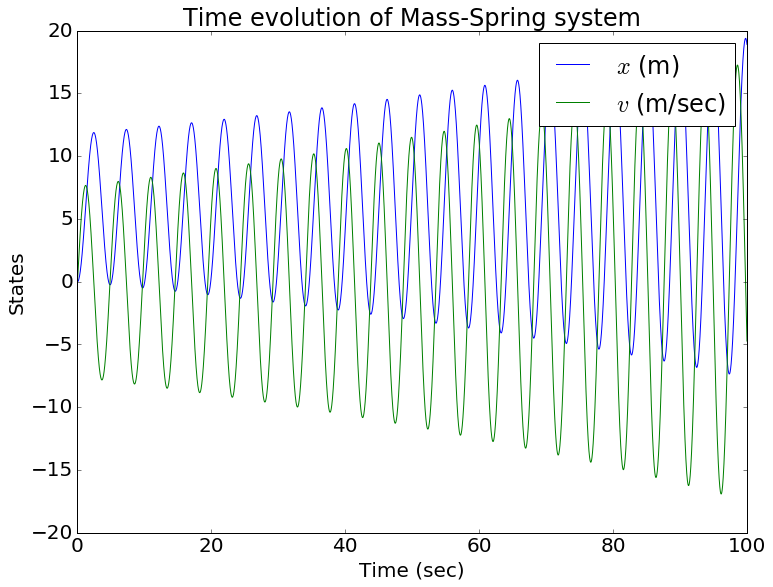

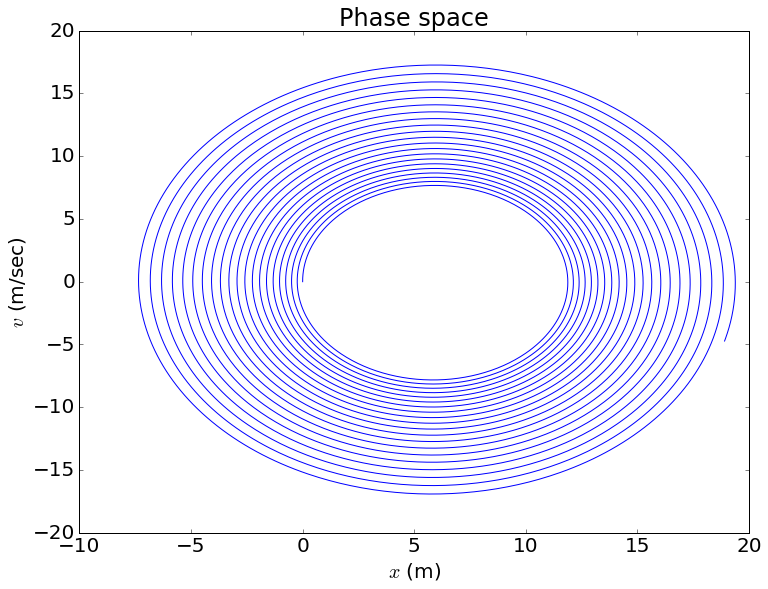

In [3]:
plotData("DataFiles/solutionForwardLowH.txt") # Forward difference approximation

The same plots with $h = 0.01$ for the central difference approximation:

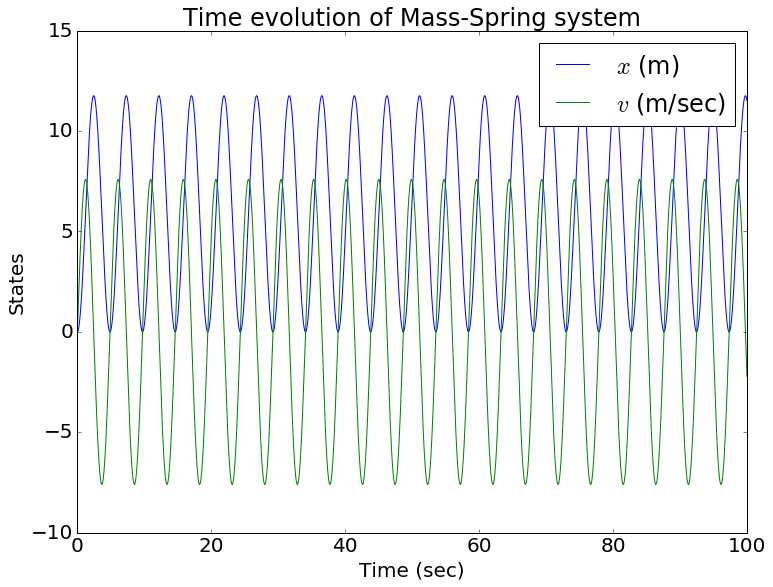

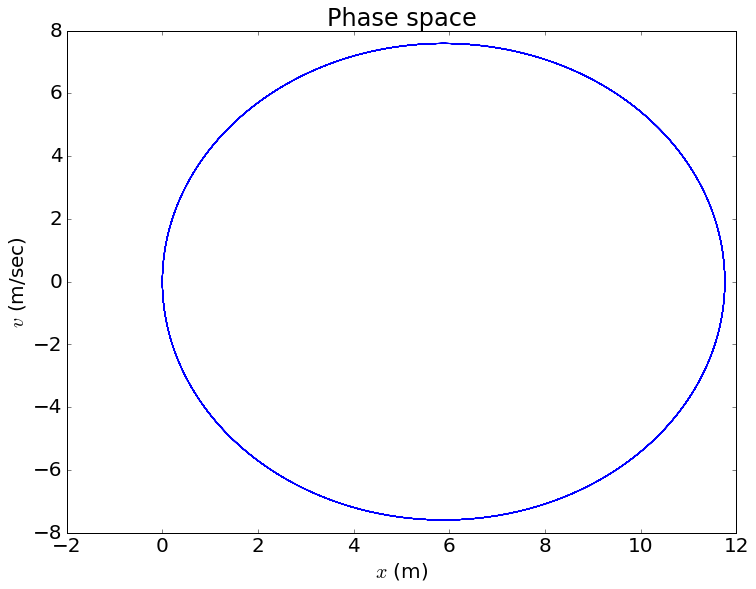

In [4]:
plotData("DataFiles/solutionCentralLowH.txt") # Central difference approximation

Using the **assignment5Tolerance.c** file, it was found that for the same value of $\epsilon = 10^{-6}$ the central difference approximation required $h = 10^{-7}$ while the forward difference approximation required $h = 10^{-8}$ to produce results whose error was less than $\epsilon$.  
  
We can interpret from the plots that the motion of the system is indeed simple harmonic as predicted by the analytical solution. The forward difference approximation results in motion with increasing amplitude, which can be explained by numerical error due to using too big a value of $h$.  
#### 1 (c)
We observe that on decreasing $\epsilon$ and increasing $h$, the solution approaches a perfect simple harmonic oscillator. By using the above C program, an $\epsilon = 10^{-2}$ with $h = 10^{-3}$ for central difference and $h = 10^{-4}$ for forward difference are required to obtain a meaningful solution.  
#### 1 (d)
It is clear from the above plots that for the same value of $h = 0.1$, the central difference approximation yields a solution closer to the simple harmonic oscillator than the forward difference method. This is also evident from the fact that the central difference method has a smaller asymptotic error of $\mathcal{O}(h^{3})$ compared to the error of $\mathcal{O}(h^2)$ for the forward difference method. The numerical analysis using the **assignment5Tolerance.c** file also shows that a smaller value of $h$ is needed for the forward difference method to achieve the same $\epsilon$ when compared to the central difference method. Therefore, the central difference approximation is clearly better than the forward difference approximation scheme.

### 1 (e) Answers to excercises in the given page
#### 1
While the spring force on the block is zero at the initial position, the net force is not zero due to the presence of gravity. This means that the block is not in its equilibrium position initially, so it will start oscillating back and forth.

#### 2
If k is negative, a larger magnitude implies a stiffer spring, which results in a higher frequency of oscillation.  
  
If k is positive, the mass does not execute simple harmonic oscillation, but instead moves faster and faster in either the positive or negative direction depending on the initial conditions. There is also a point of unstable equilibrium in this situation. The phase trajectories of this system are conjugate hyperbolas with their centre at origin(including the degenerate hyperbola which is a pair of straight lines).
  
#### 3
On running the simulation with a small damping constant of $b = 0.1$, we get the following results:

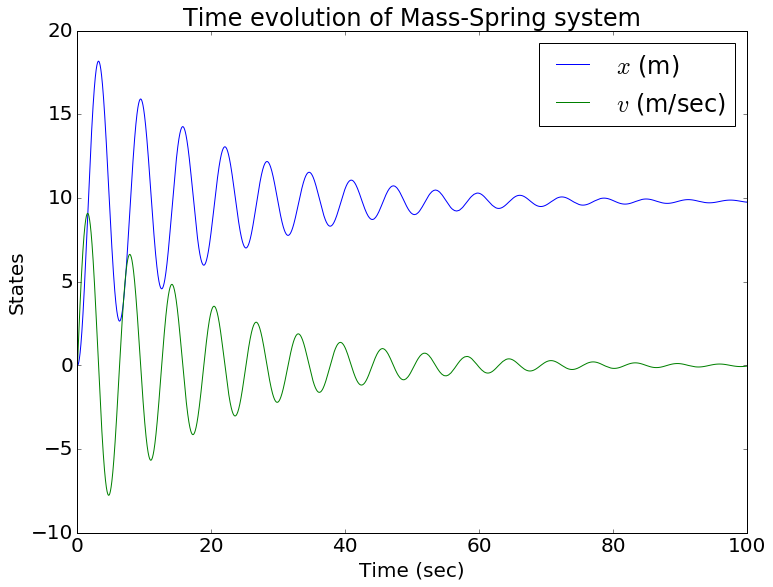

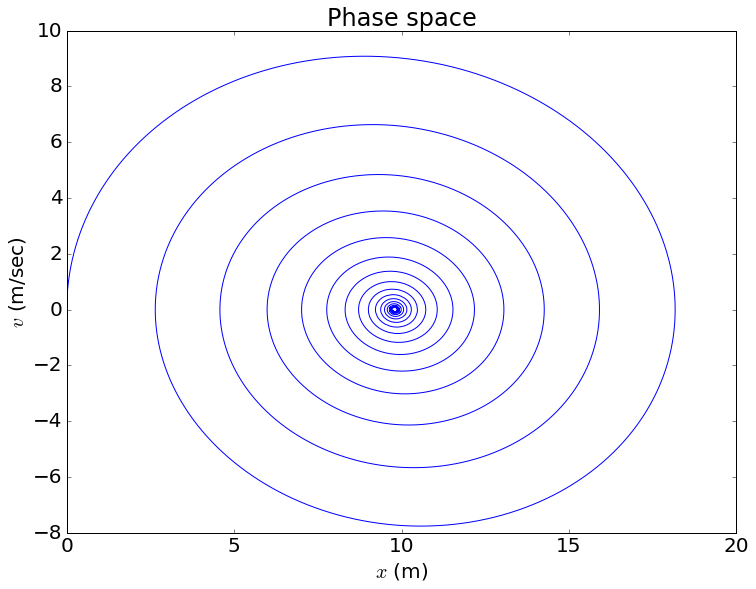

In [5]:
plotData("DataFiles/solutionCentralDamped.txt")

This motion is also called underdamped harmonic oscillation, because the value of $b$ is significantly small compared to the natural frequency of the oscillator.  
  
On using $b = -2.0$, we get the following results:

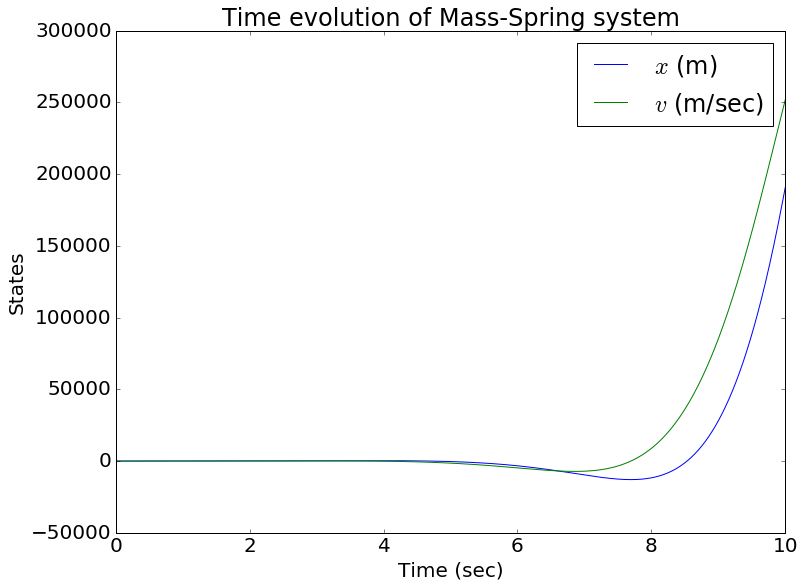

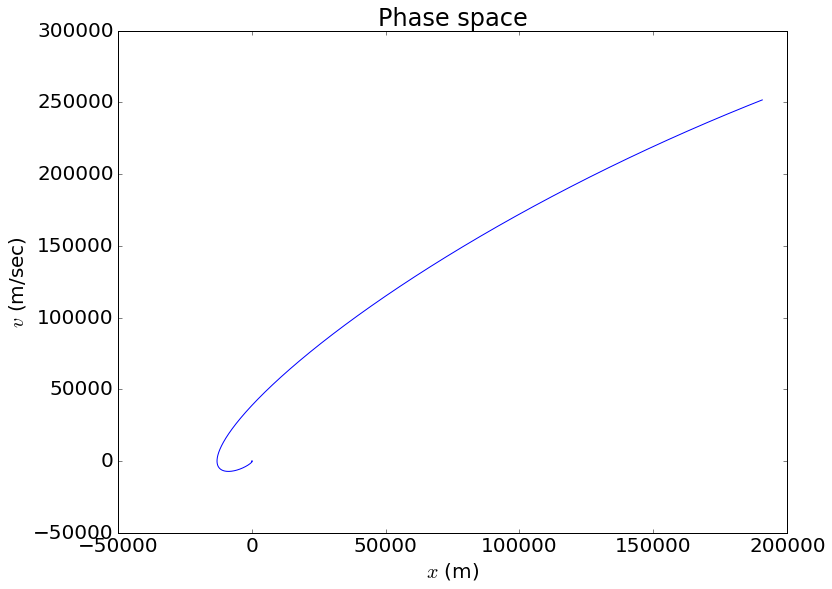

In [6]:
plotData("DataFiles/solutionNegativeDamped.txt")

The above plot indicates that the position and velocity of the mass blows up exponentially when $b = -2.0$.  
  
#### 4
If $b>0$, the velocity-proprtional term of the force is a damping force which opposes the motion of the mass. This leads to an exponentially decreasing amplitude of oscillation, which can be seen in the relevant plots. A larger value of $b$ results in fast decay of the amplitude provided it is less than a critical value. Above this critical value of $b$, the system becomes overdamped and the rate of decay of the amplitude reduces, but no oscillation is observed. 
  
If $b<0$, the velocity-proprtional term of the force is an assistive force which does not oppose the motion of the mass. This leads to an exponentially increasing amplitude of oscillation until a time is reached when the mass stops oscillating and moves exponentially fast in one direction, which can be seen in the relevant plot above. A larger value of $b$ means that this particular time will be reached faster.  

#### 5
On doubling the mass and re-running the simulation, we get the following results:

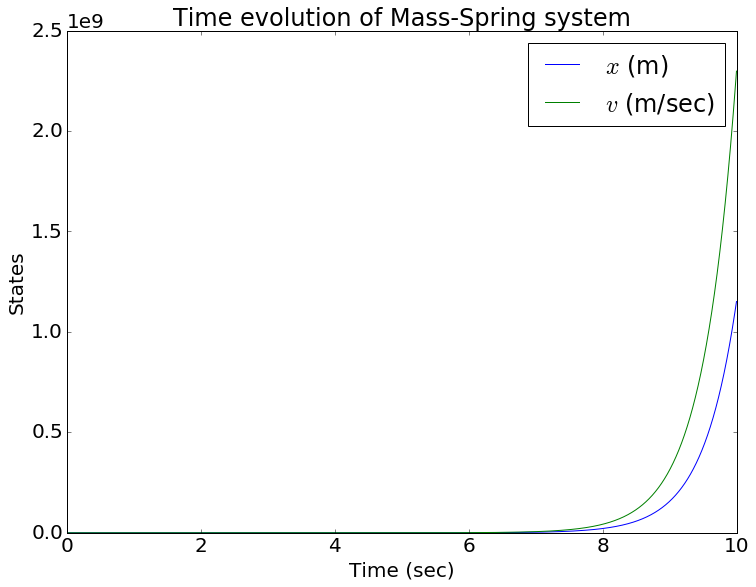

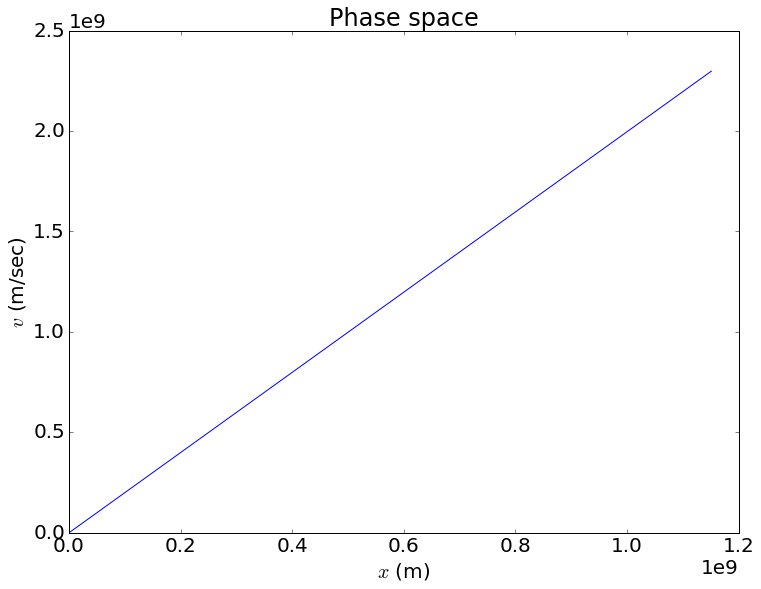

In [7]:
plotData("DataFiles/solutionNegativeDampedDoubleMass.txt")

In this case, the time at which the mass stops oscillating is reached before it can even complete one oscillation, so it never returns to the equilibrium position. This occurs because a higher value of the mass $m$ results in a longer time period of oscillation, thereby preventing the mass from returning to the equilibrium position before the velocity-proportional force starts dominating over the spring force.

#### 6
An input force is simply a time dependent component in the time derivative of the state function:
$$\textbf{y}' = \textbf{f}(\textbf{y},t)$$ 
This can be easily added by including this time dependent function while evaulating the derivative of the state function.  

### Part 2
Using $\alpha = \beta = \gamma = \sigma = 0.1$ and initial conditions $x = 0.5$ and $y = 0.5$ (as given in the link) where $x$ is the prey population and $y$ predator population, we obtain the following plots using the forward and central difference approximations.

In [8]:
def plotData2(filename):
    """Plots the data in the file with relative path filename assuming the columns are time, x and y respectively."""
    fo = open(filename, 'r')
    lines = fo.read().split("\n")
    fo.close()
    t = []
    x = []
    y = []
    # Extract values:
    for i in lines[:-1]:
        values = i.split("\t")
    
        t.append(float(values[0]))
        x.append(float(values[1]))
        y.append(float(values[2]))
    
    # Plot data:
    # Figure 1 - time domain
    xlabel("Time")
    ylabel("Population")
    title("Time evolution of Predator-Prey system")
    plot(t,x)
    plot(t,y)
    legend(('$x$ (prey)', '$y$ (predator)'))
    
    # Figure 2 - phase space
    figure()
    plot(x,y);
    title("Phase space")
    xlabel("$x$ (prey population)")
    ylabel("$y$ (predator population)")

Forward difference method using $h = 0.01$ plotted below:

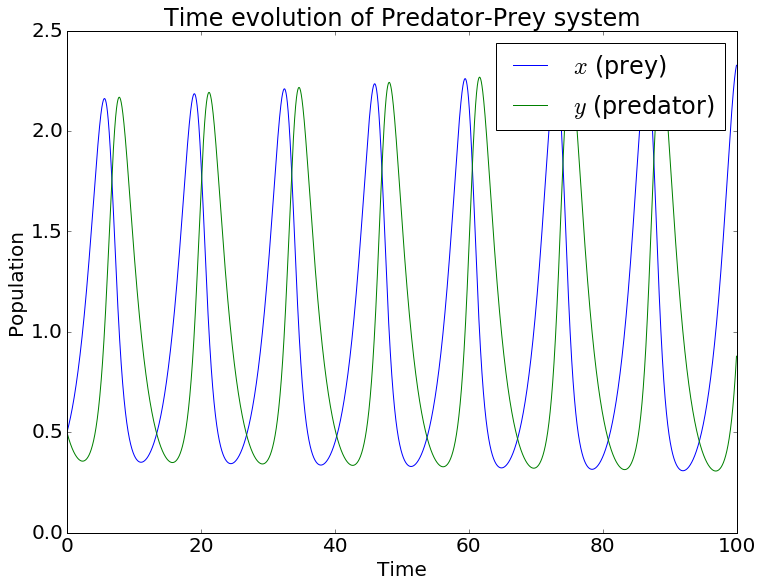

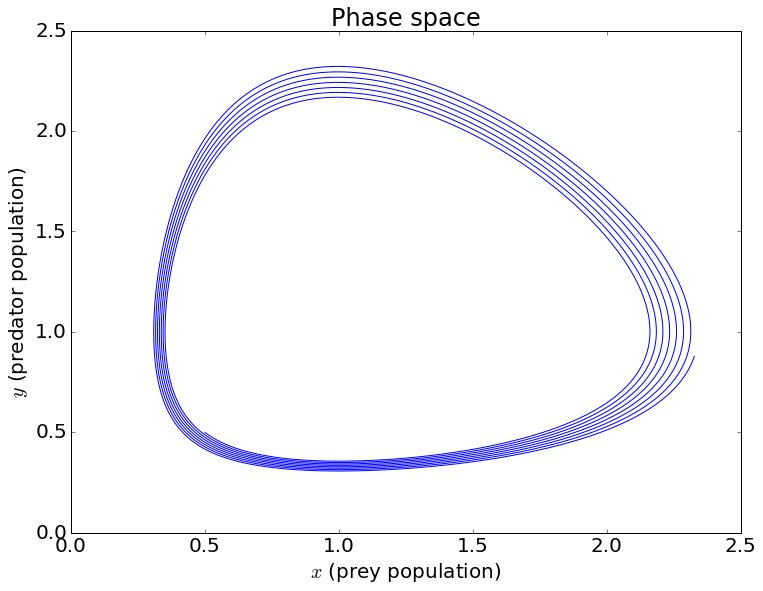

In [9]:
plotData2("DataFiles/solutionLoktaForward.txt")

Central difference method using $h = 0.01$ plotted below:

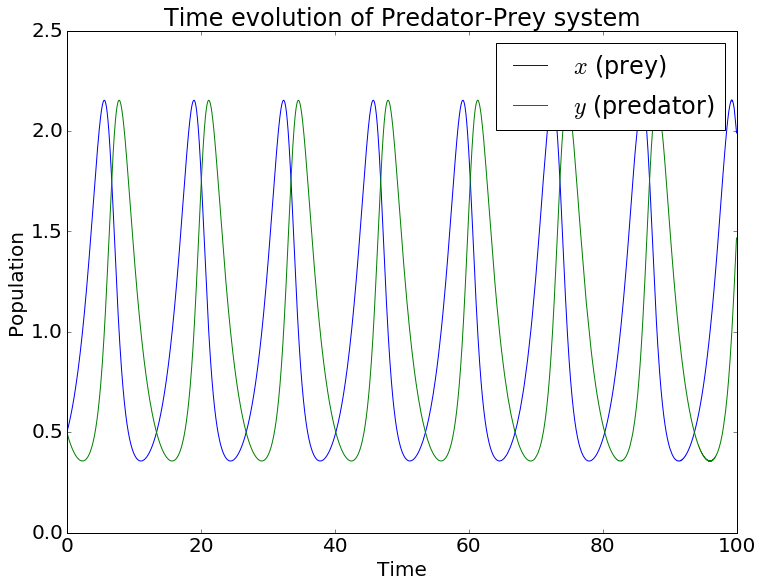

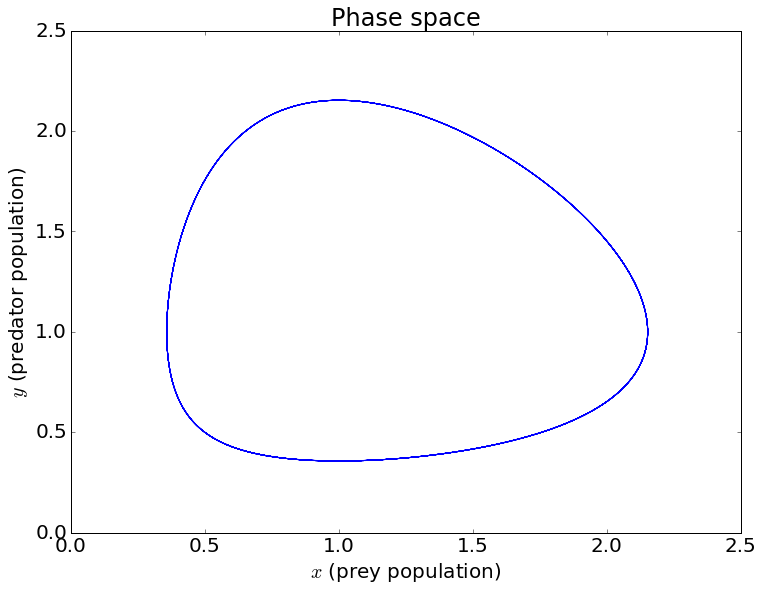

In [10]:
plotData2("DataFiles/solutionLoktaCentral.txt")

##### Inferences
We first observe that the numerical error in the forward difference method(due to using too large a value of $h$) is evident in the increasing amplitude of oscillations in the first plot.  
  
The oscillating behaviour of the plot can be explained by the fact that the prey population rapidly increases when the predator population is low, while the predator population rapidly increases when the prey population is high. This solution can also be understood using the phase plot, which shows a similar trend.  
  
We can also infer that the particular initial conditions($x = 0.5$ and $y = 0.5$) and values of the parameters $\alpha = \beta = \gamma = \sigma = 0.1$ result in a periodic solution as the phase space plot of the solution is a closed loop.